Saved: figures/blue_frac_vs_merger_score_ug.pdf and figures/blue_frac_vs_merger_score_ug.png


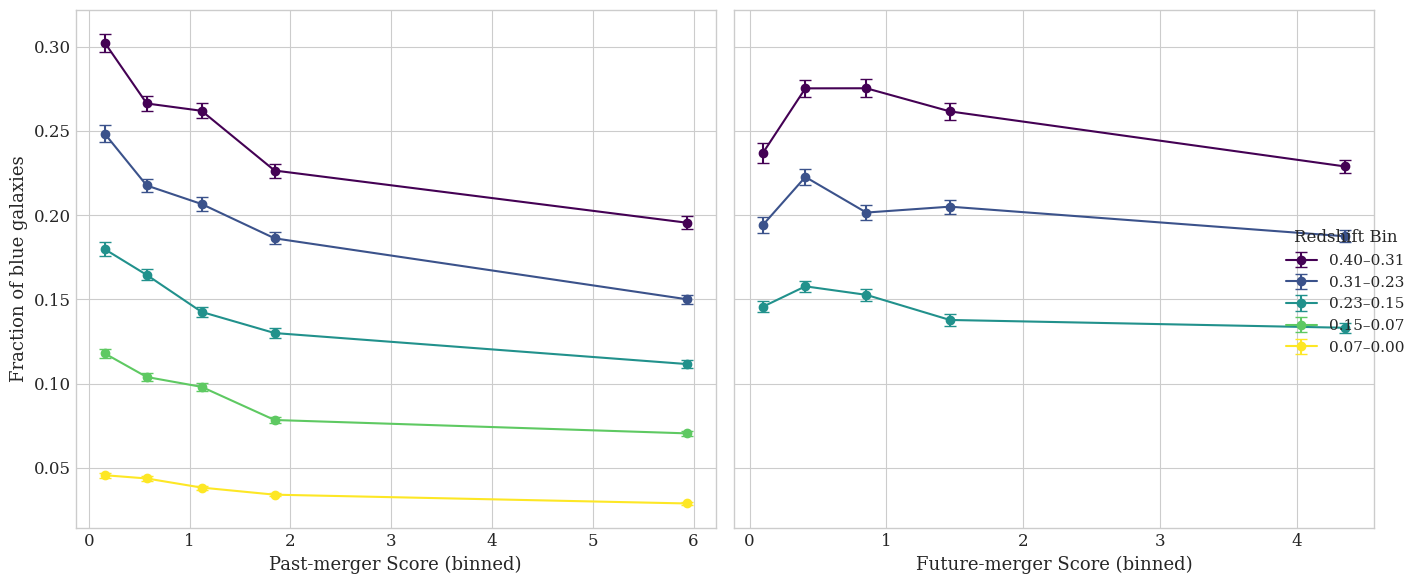

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import os
# Global plot style (APJ-safe)
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "font.family": "serif",
    "axes.labelsize": 13,
    "axes.titlesize": 13,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,
    "pdf.fonttype": 42  # Ensures TrueType font embedded (for APJ)
})


def save_figure(fig, filename, dpi=300):
    """Save figure in both PDF (for APJ) and PNG (for local use) formats."""
    base = os.path.join("figures", filename)
    fig.savefig(f"{base}.pdf", bbox_inches='tight')  # APJ-compatible vector format
    #fig.savefig(f"{base}.png", dpi=dpi, bbox_inches='tight')  # For checking / internal use
    print(f"Saved: {base}.pdf and {base}.png")

# Redshift bin label
redshift_bin_labels = {
    '72-77 z': '0.40–0.31',
    '77-82 z': '0.31–0.23',
    '82-87 z': '0.23–0.15',
    '87-93 z': '0.15–0.07',
    '93-100 z': '0.07–0.00'
}

# read data
df_pre = pd.read_csv('/users_path/merger_trace/notebooks/plot/plot_data/blue_frac/blue_frac_plot_data_pre_ug.csv')
df_post = pd.read_csv('/users_path/merger_trace/notebooks/plot/plot_data/blue_frac/blue_frac_plot_data_post_ug.csv')

# replace z_bin labels with redshift bin labels
df_pre['redshift_bin'] = df_pre['z_bin'].map(redshift_bin_labels)
df_post['redshift_bin'] = df_post['z_bin'].map(redshift_bin_labels)

z_bins_pre = df_pre['redshift_bin'].dropna().unique()
z_bins_post = df_post['redshift_bin'].dropna().unique()

# set colors
colors = cm.viridis(np.linspace(0, 1, len(z_bins_pre)))

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Pre-merger 
for i, z in enumerate(z_bins_pre):
    sub = df_pre[df_pre['redshift_bin'] == z]
    axes[0].errorbar(sub['score_bin'], sub['mean'], yerr=sub['std_error'],
                     fmt='-o', label=z, color=colors[i], capsize=4)
axes[0].set_xlabel('Past-merger Score (binned)')
axes[0].set_ylabel('Fraction of blue galaxies')
axes[0].grid(True)


# Post-merger 
for i, z in enumerate(z_bins_post):
    sub = df_post[df_post['redshift_bin'] == z]
    axes[1].errorbar(sub['score_bin'], sub['mean'], yerr=sub['std_error'],
                     fmt='-o', label=z, color=colors[i], capsize=4)
axes[1].set_xlabel('Future-merger Score (binned)')
axes[1].grid(True)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Redshift Bin",
           loc='center left', bbox_to_anchor=(0.92, 0.5), borderaxespad=0.)

save_figure(fig, "blue_frac_vs_merger_score_ug", dpi=300)
plt.tight_layout()
plt.show()
